In [1]:
import pandas as pd

In [5]:
results = pd.read_csv(r'all_results_steady_ex_v20250208.csv')
results.head(8)

,layout,AgglomerativeClustering,OPTICS,KMeans,GMM,Birch,Genie,Girvan-Newman,Leiden,assortativity,graph_id,size
0,spring,0.693041,0.358478,0.695818,0.705277,0.419346,0.599207,0.658520,0.610289,0.678181,3,25
1,davidson_harel,0.257147,0.156247,0.162423,0.208190,0.309286,0.190384,0.658520,0.610289,0.678181,3,25
2,drl,0.242543,0.128587,0.187341,0.215683,0.101413,0.241289,0.658520,0.610289,0.678181,3,25
3,fruchterman_reingold,0.211887,0.238817,0.256718,0.262730,0.434154,0.215171,0.658520,0.610289,0.678181,3,25
4,graphopt,0.440560,0.177235,0.178496,0.275118,0.266682,0.469807,0.658520,0.610289,0.678181,3,25
5,lgl,-0.023559,0.007584,-0.024197,-0.024197,-0.020903,-0.022749,0.658520,0.610289,0.678181,3,25
6,mds,0.368250,0.209323,0.315767,0.342446,0.352218,0.273685,0.658520,0.610289,0.678181,3,25
7,kamada_kawai,0.236363,0.039424,0.202132,0.171098,0.199044,0.121121,0.354769,0.485259,0.382112,30,25


In [31]:
kamada_sub = results[results['layout'] == 'kamada_kawai']
kamada_sub.drop(['assortativity', 'layout'], axis=1, inplace=True)
kamada_sub = kamada_sub.astype(float)
kamada_sub = kamada_sub.sort_values(by=['size', 'graph_id'])

spring_sub = results[results['layout'] == 'spring']
spring_sub.drop(['assortativity', 'layout'], axis=1, inplace=True)
spring_sub = spring_sub.astype(float)
spring_sub = spring_sub.sort_values(by=['size', 'graph_id'])



C:\Users\ku51015\AppData\Local\Temp\1\ipykernel_30576\1290974680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kamada_sub.drop(['assortativity', 'layout'], axis=1, inplace=True)
C:\Users\ku51015\AppData\Local\Temp\1\ipykernel_30576\1290974680.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spring_sub.drop(['assortativity', 'layout'], axis=1, inplace=True)


In [32]:
print(kamada_sub.head(2))
print(spring_sub.head(2))

    AgglomerativeClustering    OPTICS    KMeans       GMM     Birch     Genie  \
24                 0.780274  0.543895  0.790722  0.772546  0.870507  0.842854   
23                 0.689356  0.614220  0.691813  0.709263  0.738994  0.642560   

    Girvan-Newman    Leiden  graph_id  size  
24       0.872105  0.717095       0.0  25.0  
23       0.713540  0.654654       1.0  25.0  
     AgglomerativeClustering    OPTICS    KMeans       GMM     Birch  \
25                  0.806677  0.903817  0.798692  0.804144  0.968000   
256                 0.742252  0.828115  0.670424  0.661196  0.706667   

        Genie  Girvan-Newman    Leiden  graph_id  size  
25   0.718749       0.872105  0.717095       0.0  25.0  
256  0.719317       0.713540  0.654654       1.0  25.0  


In [33]:
common_columns = kamada_sub.columns.intersection(spring_sub.columns)
kamada_sub = kamada_sub.reset_index(drop=True)
spring_sub = spring_sub.reset_index(drop=True)

diff = kamada_sub.subtract(spring_sub, axis=1)
diff

,AgglomerativeClustering,OPTICS,KMeans,GMM,Birch,Genie,Girvan-Newman,Leiden,graph_id,size
0,-0.026403,-0.359922,-0.007970,-0.031598,-0.097493,0.124105,0.0,0.0,0.0,0.0
1,-0.052897,-0.213895,0.021389,0.048067,0.032327,-0.076757,0.0,0.0,0.0,0.0
2,-0.015425,-0.257830,0.164125,0.134498,0.112009,-0.055642,0.0,0.0,0.0,0.0
3,-0.284573,-0.159376,-0.225282,-0.233453,0.098403,-0.129901,0.0,0.0,0.0,0.0
4,-0.151673,0.002640,-0.016664,-0.088632,0.027968,-0.116541,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
189,0.095158,-0.094192,0.140193,0.143659,0.103006,0.002454,0.0,0.0,0.0,0.0
190,-0.179973,-0.128856,-0.133179,-0.126678,-0.087867,-0.248873,0.0,0.0,0.0,0.0
191,-0.354083,0.023620,-0.231465,-0.250319,0.034315,-0.241382,0.0,0.0,0.0,0.0
192,-0.090433,-0.007477,-0.083464,-0.089914,-0.062033,-0.124719,0.0,0.0,0.0,0.0


In [38]:
# check if the rows are mathing to the same graph ids (and sizes)
set(diff['graph_id'] == 0)

{True}

In [39]:
set(diff['size'] == 0)

{True}

In [40]:
diff.drop(['graph_id', 'size'], axis=1, inplace=True)

In [41]:
diff.drop(['Girvan-Newman', 'Leiden'], axis=1, inplace=True)

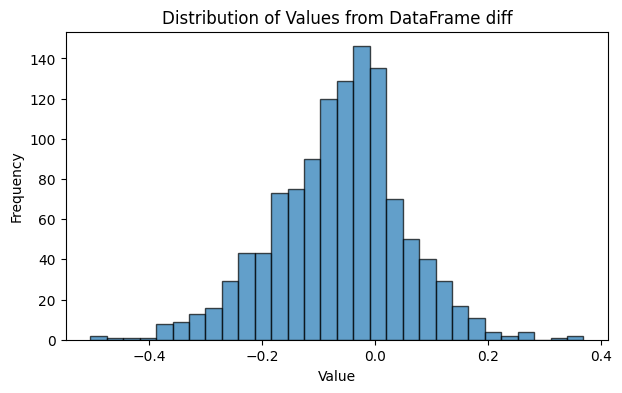

In [43]:
import matplotlib.pyplot as plt

# Assuming diff is your dataframe
# Unwind all values into a list
values_list = diff.values.flatten().tolist()

# Plot the distribution of those values
plt.figure(figsize=(7, 4))
plt.hist(values_list, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Values from DataFrame diff')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [45]:
kamada_sub.drop(['graph_id', 'size'], axis=1, inplace=True)
spring_sub.drop(['graph_id', 'size'], axis=1, inplace=True)

In [47]:
kamada_sub.drop(['Girvan-Newman', 'Leiden'], axis=1, inplace=True)
spring_sub.drop(['Girvan-Newman', 'Leiden'], axis=1, inplace=True)
kamada_sub

,AgglomerativeClustering,OPTICS,KMeans,GMM,Birch,Genie
0,0.780274,0.543895,0.790722,0.772546,0.870507,0.842854
1,0.689356,0.614220,0.691813,0.709263,0.738994,0.642560
2,0.772573,0.431957,0.823106,0.820862,0.967949,0.772551
3,0.408468,0.199102,0.470536,0.471824,0.517750,0.469305
4,0.335083,0.135161,0.408858,0.353791,0.428447,0.260823
...,...,...,...,...,...,...
189,0.734206,0.121836,0.812481,0.807418,0.456562,0.570560
190,0.522578,0.042297,0.526112,0.548223,0.420959,0.417034
191,0.317249,0.074944,0.403329,0.411564,0.408088,0.287601
192,0.400271,0.027564,0.411452,0.411688,0.371902,0.282813


In [49]:
from scipy.stats import ttest_rel, wilcoxon

# Flatten the values into lists
kamada_values = kamada_sub.values.flatten()
spring_values = spring_sub.values.flatten()

# Perform paired t-test
t_stat, p_value_ttest = ttest_rel(kamada_values, spring_values)
print(f"Paired t-test: t-statistic = {t_stat}, p-value = {p_value_ttest}")

# # Perform Wilcoxon signed-rank test
# w_stat, p_value_wilcoxon = wilcoxon(kamada_values, spring_values)
# print(f"Wilcoxon signed-rank test: w-statistic = {w_stat}, p-value = {p_value_wilcoxon}")

# Interpret the results
alpha = 0.05
if p_value_ttest < alpha:
    print("Paired t-test: The difference is statistically significant.")
else:
    print("Paired t-test: The difference is not statistically significant.")

# if p_value_wilcoxon < alpha:
#     print("Wilcoxon signed-rank test: The difference is statistically significant.")
# else:
#     print("Wilcoxon signed-rank test: The difference is not statistically significant.")

Paired t-test: t-statistic = -18.915292292838593, p-value = 8.784079617119201e-70
Paired t-test: The difference is statistically significant.


# for all clusering methods separately

In [50]:
diff

,AgglomerativeClustering,OPTICS,KMeans,GMM,Birch,Genie
0,-0.026403,-0.359922,-0.007970,-0.031598,-0.097493,0.124105
1,-0.052897,-0.213895,0.021389,0.048067,0.032327,-0.076757
2,-0.015425,-0.257830,0.164125,0.134498,0.112009,-0.055642
3,-0.284573,-0.159376,-0.225282,-0.233453,0.098403,-0.129901
4,-0.151673,0.002640,-0.016664,-0.088632,0.027968,-0.116541
...,...,...,...,...,...,...
189,0.095158,-0.094192,0.140193,0.143659,0.103006,0.002454
190,-0.179973,-0.128856,-0.133179,-0.126678,-0.087867,-0.248873
191,-0.354083,0.023620,-0.231465,-0.250319,0.034315,-0.241382
192,-0.090433,-0.007477,-0.083464,-0.089914,-0.062033,-0.124719


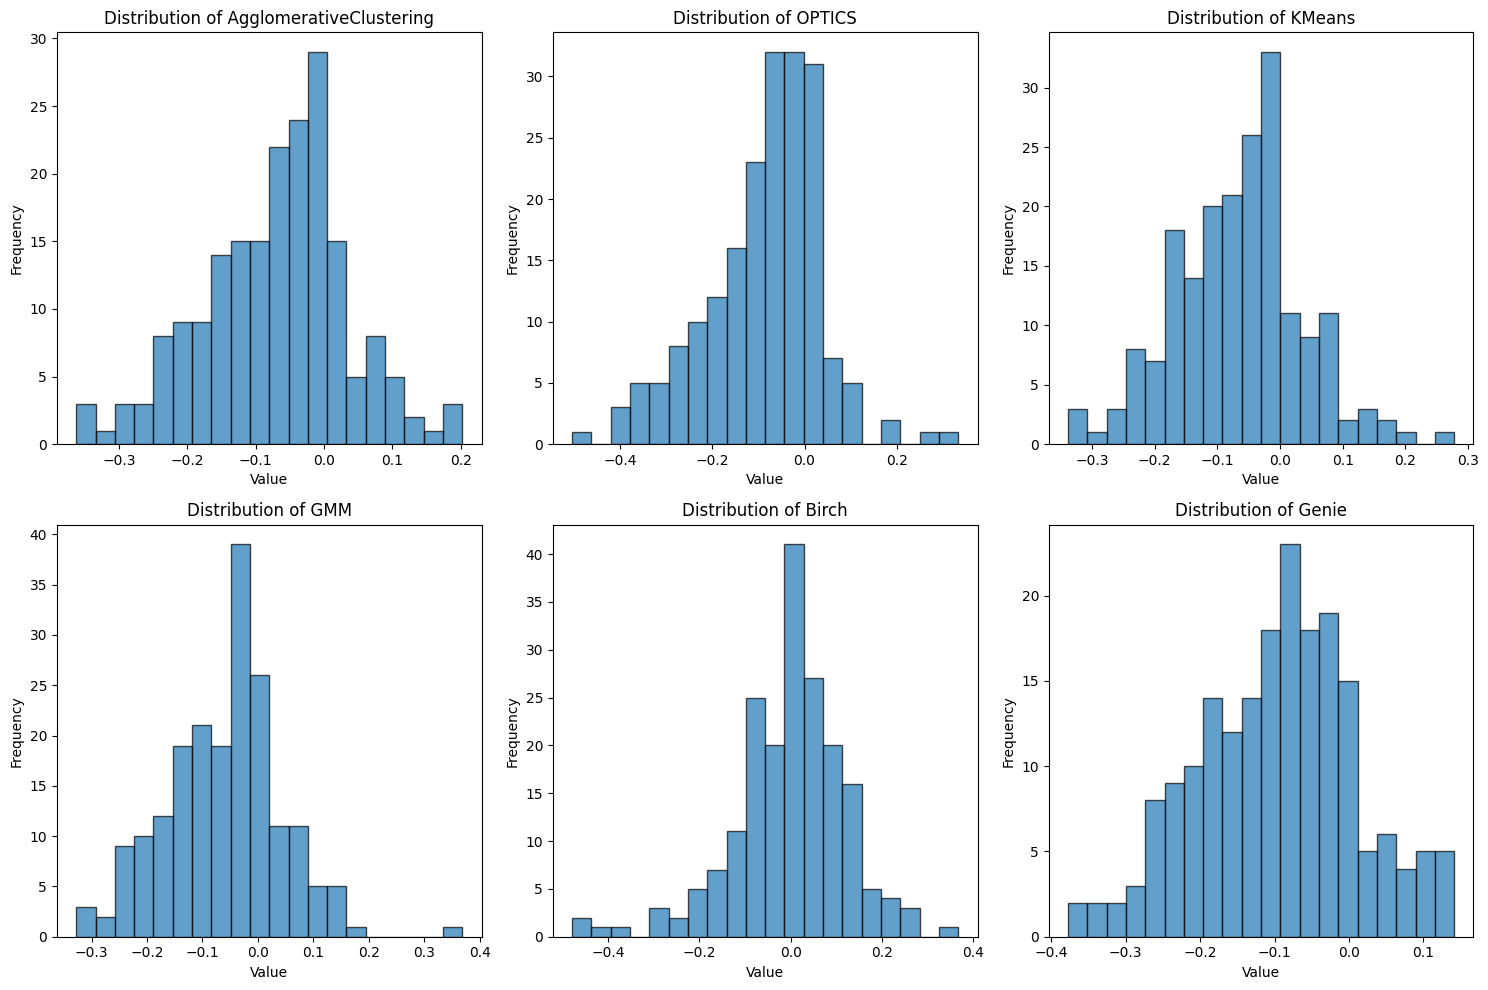

In [52]:
# Assuming diff is your DataFrame
num_columns = len(diff.columns)
num_rows = (num_columns + 2) // 3  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(diff.columns):
    axes[i].hist(diff[col], bins=20, edgecolor='k', alpha=0.7)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [54]:
from scipy.stats import ttest_rel, wilcoxon

for colname in list(diff.columns):
# Flatten the values into lists
    kamada_values = kamada_sub[colname].values.flatten()
    spring_values = spring_sub[colname].values.flatten()

# Perform paired t-test
    t_stat, p_value_ttest = ttest_rel(kamada_values, spring_values)
    print(' ============== ')
    print(colname)
    print(f"Paired t-test: t-statistic = {t_stat}, p-value = {p_value_ttest}")
    # Interpret the results
    alpha = 0.05
    if p_value_ttest < alpha:
        print("Paired t-test: The difference is statistically significant.")
    else:
        print("Paired t-test: The difference is not statistically significant.")


AgglomerativeClustering
Paired t-test: t-statistic = -9.55325365787043, p-value = 5.925746401346792e-18
Paired t-test: The difference is statistically significant.
OPTICS
Paired t-test: t-statistic = -9.809405791918026, p-value = 1.0972823702180504e-18
Paired t-test: The difference is statistically significant.
KMeans
Paired t-test: t-statistic = -8.944973731302158, p-value = 3.0517682443600527e-16
Paired t-test: The difference is statistically significant.
GMM
Paired t-test: t-statistic = -8.1165022505983, p-value = 5.522563217962099e-14
Paired t-test: The difference is statistically significant.
Birch
Paired t-test: t-statistic = -0.3058573871358051, p-value = 0.7600428888529311
Paired t-test: The difference is not statistically significant.
Genie
Paired t-test: t-statistic = -12.45083478190616, p-value = 1.6693721999736483e-26
Paired t-test: The difference is statistically significant.
